<a href="https://colab.research.google.com/github/fire-long/24-1DataPatternRecognition/blob/master/W2_Class1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Meathod of Least Squares(최소제곱법)

In [1]:
import numpy as np

In [2]:
#공부한 시간과 점수를 각각 x, y라는 이름의 넘파일 배열로 만듦
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

#x의 평균값을 구하기
mx = np.mean(x)
#y의 평균값을 구하기
my = np.mean(y)

#출력 확인
print("x의 평균값: ", mx)
print("y의 평균값: ", my)

x의 평균값:  5.0
y의 평균값:  90.5


In [3]:
#기울기 공식의 분모 부분
divisor = sum([(i-mx)**2 for i in x])
#sum : Sigma에 해당하는 함수
#**2:제곱을 구하라는 의미
#for i in x : x의 각 원소를 한번씩 i자리에 대입

In [4]:
#기울기 공식의 분자 부분
def top(x, mx, y, my):
#def : 함수를 만드는 예약어. top()함수를 만들어 최소제곱법 분자식 구현
		d = 0
		for i in range(len(x)):
		#len(list)는 list 안 원소 개수를 알려줌. x의 원소가 4개이므로 len(x)==4
		#range():0부터 괄호 안의 숫자 바로 전(3)까지 연속적인 숫자 객체를 만듦.
		#range(4) : 0, 1, 2, 3 생성
			d += (x[i] - mx) * (y[i] - my)
		return d
dividend = top(x, mx, y, my)
#임의의 변수 d에 x 개수만큼
#x의 각 원소와 평균의 차, y의 각 원소와 평균의 차를 곱해서
#차례로 더하는 최소제곱법 구현

In [5]:
#출력으로 확인
print("분모: ", divisor)
print("분자: ", dividend)

분모:  20.0
분자:  46.0


In [6]:
#기울기 a
a = dividend / divisor
#y절편 b
b = my-(mx*a)

In [8]:
#출력으로 확인
print("기울기 a =", a)
print("y절편 b = ", b)

기울기 a = 2.3
y절편 b =  79.0


# Mean Square Error(평균 제곱 오차)


In [9]:
import numpy as np

In [10]:
#가상의 기울기 a와 y절편 b를 정하기
fake_a = 3
fake_b = 76

#공부한 시간과 점수를 각각 x, y라는 이름의 넘파일 배열로 만듦
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

# y = ax+b에 가상의 값들을 대입한 결과를 출력하는 함수식 predict() 정의
def predict(x):
  return fake_a*x+fake_b

#예측값이 들어갈 빈 리스트
predict_result = []

#모든 x값을 predict() 함수에 한번씩 대입해 predict_result를 완성
for i in range(len(x)):
  predict_result.append(predict(x[i]))
  print("공부시간=%.f, 실제점수=%.f, 예측점수=%.f"%(x[i], y[i], predict(x[i])))
#평균 제곱 오차(y는 실제값, y_pred는 예측값) 함수를 각 y값에 ㅐ입해 최종값 구하는 함수
n = len(x)
def mse(y, y_pred):
  return (1/n)*sum((y-y_pred)**2)
#평균제곱오차 값 출력
print("평균 제곱 오차: "+str(mse(y, predict_result)))

공부시간=2, 실제점수=81, 예측점수=82
공부시간=4, 실제점수=93, 예측점수=88
공부시간=6, 실제점수=91, 예측점수=94
공부시간=8, 실제점수=97, 예측점수=100
평균 제곱 오차: 11.0


- 우리가 처음 가정한, a = 3, b = 76은 오차가약 11.0이라는 것을 알게 됨.
- 이제, 남은 것은 이 오차를 줄이면서 새로운선을 긋는 것.
- 이를 위해서는, a 값과 b 값을 적절히 조절하면서 오차의 변화를 살펴보고, 그 오차가최소화되는 a 값과 b 값을 구해야 함.

# Gradient Descent(경사하강법)

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
#공부한 시간과 점수를 각각 x, y라는 이름의 넘파일 배열로 만듦
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

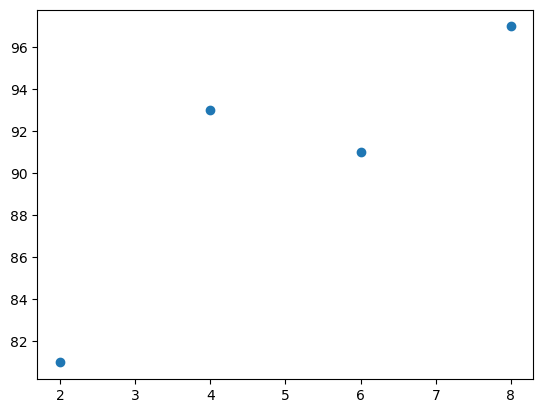

In [16]:
#데이터의 분포를 그래프로 나타냄
plt.scatter(x, y)
plt.show()

In [17]:
#기울기 a의 값과 절편 b의 값을 초기화
a = 0
b = 0

#몇 번 반복될지 설정
epochs = 2001

#x값이 총 몇개인지
n = len(x)

In [18]:
lr = 0.03 #학습률 #여러 학습률을 적용해보며 최적의 결과를 만드는 학습률을 찾아낸 것임
#최적의 학습률은 데이터 및 딥러닝 모델에 따라 다르므로 그때그때 조금 휴리스틱하게 찾아내야 함.
#대신 앞으로 최적의 학습률을 찾아주는 최적화 알고리즘을 배울 예정

epoch=0, 기울기=5.4639, 절편=47.9935
epoch=100, 기울기=6.0148, 절편=56.8319
epoch=200, 기울기=4.9845, 절편=62.9798
epoch=300, 기울기=4.2400, 절편=67.4227
epoch=400, 기울기=3.7020, 절편=70.6334
epoch=500, 기울기=3.3132, 절편=72.9537
epoch=600, 기울기=3.0322, 절편=74.6306
epoch=700, 기울기=2.8291, 절편=75.8423
epoch=800, 기울기=2.6824, 절편=76.7181
epoch=900, 기울기=2.5763, 절편=77.3509
epoch=1000, 기울기=2.4997, 절편=77.8083
epoch=1100, 기울기=2.4443, 절편=78.1388
epoch=1200, 기울기=2.4043, 절편=78.3776
epoch=1300, 기울기=2.3754, 절편=78.5502
epoch=1400, 기울기=2.3545, 절편=78.6750
epoch=1500, 기울기=2.3394, 절편=78.7651
epoch=1600, 기울기=2.3284, 절편=78.8302
epoch=1700, 기울기=2.3206, 절편=78.8773
epoch=1800, 기울기=2.3149, 절편=78.9113
epoch=1900, 기울기=2.3107, 절편=78.9359
epoch=2000, 기울기=2.3078, 절편=78.9537


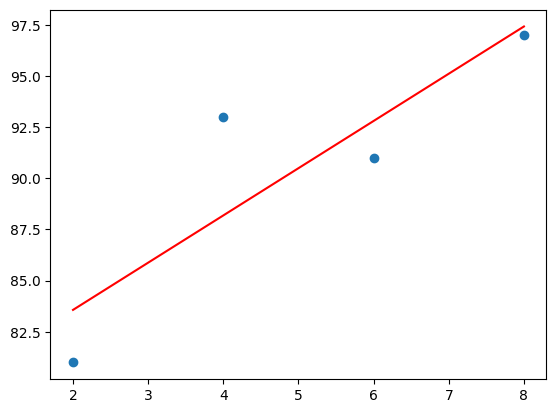

In [23]:
#경사하강법 시작
for i in range(epochs): #epochs 수만큼 반복
    y_pred = a * x + b #예측값을 구하는 식
    error = y - y_pred #실제값과 비교한 오차를 error로 놓음.

    a_diff = (2/n) * sum(-x*(error)) #오차 함수를 a로 편미분한 값
    b_diff = (2/n) * sum(-(error)) #오차 함수를 b로 편미분한 값

    a = a - lr * a_diff #학습률을 곱해 기존의 a값을 업데이트
    b = b - lr * b_diff #학습률을 곱해 기존의 b값을 업데이트
    if i%100 == 0: #100번 반복될 때마다 현재의 a, b값을 출력함
      print("epoch=%.f, 기울기=%.04f, 절편=%.04f"%(i,a,b))
#앞서 구한 최종 a값을 기울기, b값을 y절편에 대입해 그래프를 그림
y_pred = a * x + b

#그래프 출력
plt.scatter(x, y)
plt.plot(x, y_pred, 'r')
plt.show()

# Multiple Regression(다중 선형 회귀)

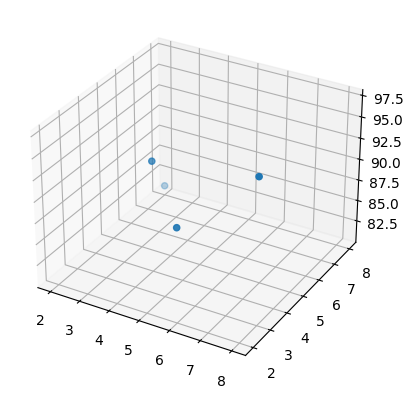

In [20]:
import numpy as np
import matplotlib.pyplot as plt

#공부 시간 x1과 과외시간 x2, 성적 y의 넘파이 배열을 만듦
x1 = np.array([2, 4, 6, 8])
x2 = np.array([8, 4, 2, 3])
y = np.array([81, 93, 91, 97])

#데이터의 분포를 그래프로 나타냄
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x1, x2, y);
plt.show()
#x2 축이 하나 더 늘어 3D로 3축(x1, x2, y)로 배치됨

#새로운 변수 x2가 추가되면 차원이 하나 추가되면서 계산이 더 복잡해짐
#선형회귀는 선을 긋는 작업 -> 다중 선형 회귀는 평면을 그리는 작업

In [22]:
#기울기 a의 값과 절편 b의 값을 초기화
a1 = 0
a2 = 0
b = 0

#학습률
lr = 0.01

#몇 번 반복될지 설정
epochs = 2001

#x값이 총 몇 개인지 세기. x1과 x2의 수가 같으므로 x1만 세기. 변수의 총 개수
n = len(x1)

#경사하강법 시작
for i in range(epochs): #epochs 수만큼 반복
## 예측 값을 구하는 식
    y_pred = a1 * x1 + a2 * x2 + b #예측값을 구하는 식. 기울기와 절편 자리에 a1, a2, b를 각각 대입
    error = y - y_pred #실제값과 비교한 오차를 error로 놓음.
## 오차 함수를 a1, a2, b로 각각 편미분한 값들
    a1_diff = (2/n) * sum(-x1*(error)) #오차 함수를 a1로 편미분한 값
    a2_diff = (2/n) * sum(-x2*(error)) #오차 함수를 a2로 편미분한 값
    b_diff = (2/n) * sum(-(error)) #오차 함수를 b로 편미분한 값
## 학습률(lr)을 곱해 기존 기울기와 절편을 업데이트한 값을 구함
    a1 = a1 - lr * a1_diff #학습률을 곱해 기존의 a1값을 업데이트
    a2 = a2 - lr * a2_diff #학습률을 곱해 기존의 a2값을 업데이트
    b = b - lr * b_diff #학습률을 곱해 기존의 b값을 업데이트

    if i%100 == 0: #100번 반복될 때마다 현재의 a, b값을 출력함
      print("epoch=%.f, 기울기1=%.04f, 기울기2=%.04f, 절편=%.04f"%(i,a1, a2, b))

epoch=0, 기울기1=9.2800, 기울기2=7.4650, 절편=1.8100
epoch=100, 기울기1=10.3213, 기울기2=7.5682, 절편=5.1737
epoch=200, 기울기1=9.9924, 기울기2=7.2505, 절편=8.2259
epoch=300, 기울기1=9.6757, 기울기2=6.9445, 절편=11.1652
epoch=400, 기울기1=9.3708, 기울기2=6.6499, 절편=13.9957
epoch=500, 기울기1=9.0771, 기울기2=6.3661, 절편=16.7214
epoch=600, 기울기1=8.7943, 기울기2=6.0929, 절편=19.3462
epoch=700, 기울기1=8.5219, 기울기2=5.8298, 절편=21.8738
epoch=800, 기울기1=8.2597, 기울기2=5.5764, 절편=24.3079
epoch=900, 기울기1=8.0071, 기울기2=5.3324, 절편=26.6520
epoch=1000, 기울기1=7.7639, 기울기2=5.0974, 절편=28.9092
epoch=1100, 기울기1=7.5297, 기울기2=4.8711, 절편=31.0829
epoch=1200, 기울기1=7.3042, 기울기2=4.6532, 절편=33.1761
epoch=1300, 기울기1=7.0870, 기울기2=4.4434, 절편=35.1919
epoch=1400, 기울기1=6.8778, 기울기2=4.2413, 절편=37.1330
epoch=1500, 기울기1=6.6764, 기울기2=4.0467, 절편=39.0023
epoch=1600, 기울기1=6.4825, 기울기2=3.8593, 절편=40.8024
epoch=1700, 기울기1=6.2957, 기울기2=3.6789, 절편=42.5359
epoch=1800, 기울기1=6.1158, 기울기2=3.5051, 절편=44.2052
epoch=1900, 기울기1=5.9426, 기울기2=3.3378, 절편=45.8127
epoch=2000, 기울기1=5.7759, 기울기2=3.17

In [24]:
##실제 점수와 예측된 점수를 출력해 예측이 잘 되는지 확인
print("실제 점수: ", y)
print("예측 점수: ", y_pred)
#2000번 반복 시 최적의 기울기 a1, a1, 절편을 찾아가며 실제 점수와 가까운 예측값을 만들어내고 있음

실제 점수:  [81 93 91 97]
예측 점수:  [83.56921727 88.18473443 92.80025159 97.41576876]


## Tensorflow Implementaion of Linear&Multiple Regression

### Linear Regression

In [27]:
import numpy as np
import matplotlib.pyplot as plt

#텐서플로의 케라스 API에서 필요한 함수들을 불러옴
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

model = Sequential()

#출력 값, 입력 변수, 분석 방법에 맞게끔 모델을 설정함.
model.add(Dense(1, input_dim=1, activation='linear'))

#오차 수정을 위해 경사하강법(sgd)을 사용. 오차 정도를 판단하기 위해선 평균 제곱 오차(mse)를 사용
model.compile(optimizer='sgd', loss='mse')

#오차를 최소화하는 과정을 2000번 반복함
model.fit(x, y, epochs=2000)

Epoch 1/2000
1/1 [==============================] - 0s 329ms/step - loss: 7384.8950
Epoch 2/2000
1/1 [==============================] - 0s 8ms/step - loss: 1920.2432
Epoch 3/2000
1/1 [==============================] - 0s 7ms/step - loss: 1112.2576
Epoch 4/2000
1/1 [==============================] - 0s 7ms/step - loss: 988.2546
Epoch 5/2000
1/1 [==============================] - 0s 7ms/step - loss: 964.7465
Epoch 6/2000
1/1 [==============================] - 0s 7ms/step - loss: 956.0326
Epoch 7/2000
1/1 [==============================] - 0s 7ms/step - loss: 949.5256
Epoch 8/2000
1/1 [==============================] - 0s 10ms/step - loss: 943.3770
Epoch 9/2000
1/1 [==============================] - 0s 6ms/step - loss: 937.3142
Epoch 10/2000
1/1 [==============================] - 0s 6ms/step - loss: 931.2978
Epoch 11/2000
1/1 [==============================] - 0s 7ms/step - loss: 925.3212
Epoch 12/2000
1/1 [==============================] - 0s 7ms/step - loss: 919.3834
Epoch 13/2000
1/1 [

1/1 [==============================] - 0s 160ms/step


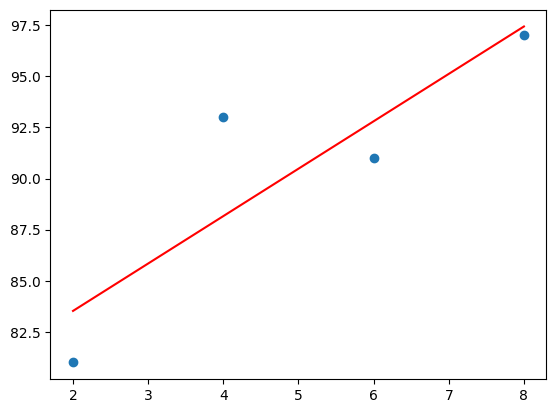

In [28]:
plt.scatter(x, y)
plt.plot(x, model.predict(x), 'r') #예측 결과를 그래프로 나타냄
plt.show()

In [29]:
#임의의 시간을 집어넣어 점수를 예측하는 모델 테스트
hour = 7
prediction = model.predict([hour])
print("%.f시간을 공부할 경우의 예상점수는 %.02f점입니다."%(hour, prediction))

1/1 [==============================] - 0s 70ms/step
7시간을 공부할 경우의 예상점수는 95.12점입니다.


<ipython-input-29-3878c7acfa36>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("%.f시간을 공부할 경우의 예상점수는 %.02f점입니다."%(hour, prediction))


### Multiple Regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#텐서플로의 케라스 API에서 필요한 함수들을 불러옴
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

x = np.array([[2,0], [4,4], [6,2], [8,3]])
y = np.array([81, 93, 91, 97])

model = Sequential()

#출력 값, 입력 변수, 분석 방법에 맞게끔 모델을 설정함.
#입력 변수가 두 개(학습시간, 과외시간)이므로 input_dim에 2를 입력
model.add(Dense(1, input_dim=2, activation='linear'))

#오차 수정을 위해 경사하강법(sgd)을 사용. 오차 정도를 판단하기 위해선 평균 제곱 오차(mse)를 사용
model.compile(optimizer='sgd', loss='mse')

#오차를 최소화하는 과정을 2000번 반복함
model.fit(x, y, epochs=2000)

Epoch 1/2000
1/1 [==============================] - 0s 352ms/step - loss: 8744.9941
Epoch 2/2000
1/1 [==============================] - 0s 9ms/step - loss: 1473.2721
Epoch 3/2000
1/1 [==============================] - 0s 16ms/step - loss: 956.4010
Epoch 4/2000
1/1 [==============================] - 0s 13ms/step - loss: 914.6326
Epoch 5/2000
1/1 [==============================] - 0s 12ms/step - loss: 906.3130
Epoch 6/2000
1/1 [==============================] - 0s 13ms/step - loss: 900.3810
Epoch 7/2000
1/1 [==============================] - 0s 14ms/step - loss: 894.6514
Epoch 8/2000
1/1 [==============================] - 0s 11ms/step - loss: 888.9702
Epoch 9/2000
1/1 [==============================] - 0s 12ms/step - loss: 883.3267
Epoch 10/2000
1/1 [==============================] - 0s 13ms/step - loss: 877.7195
Epoch 11/2000
1/1 [==============================] - 0s 17ms/step - loss: 872.1485
Epoch 12/2000
1/1 [==============================] - 0s 8ms/step - loss: 866.6135
Epoch 13/200

In [4]:
#임의의 시간을 집어넣어 점수를 예측하는 모델 테스트
hour = 7
private_class = 4
prediction = model.predict([[hour, private_class]])
print("%.f시간을 공부하고, %.f시간의 과외를 받을 경우, 예상점수는 %.02f점입니다."%(hour, private_class, prediction))

1/1 [==============================] - 0s 106ms/step
7시간을 공부하고, 4시간의 과외를 받을 경우, 예상점수는 97.53점입니다.


<ipython-input-4-2e4a4ef51929>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("%.f시간을 공부하고, %.f시간의 과외를 받을 경우, 예상점수는 %.02f점입니다."%(hour, private_class, prediction))
